In [8]:
from textrank4zh import TextRank4Keyword, TextRank4Sentence
import jieba.analyse
from snownlp import SnowNLP
import pandas as pd
import numpy as np
import operator
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
import struct
import os
import collections
import re

In [2]:
#关键词抽取
def keywords_extraction(text):
    tr4w=TextRank4Keyword(allow_speech_tags=['n', 'nr', 'nrfg', 'ns', 'nt', 'nz'])
    tr4w.analyze(text=text, window=2, lower=True, vertex_source='all_filters', edge_source='no_stop_words',
                 pagerank_config={'alpha': 0.85, })
    keywords = tr4w.get_keywords(num=6, word_min_len=2)
    return keywords

In [4]:
#关键短语抽取
def keyphrases_extraction(text):
    tr4w = TextRank4Keyword()
    tr4w.analyze(text=text, window=2, lower=True, vertex_source='all_filters', edge_source='no_stop_words',
                 pagerank_config={'alpha': 0.85, })
    keyphrases = tr4w.get_keyphrases(keywords_num=6, min_occur_num=1)
    # keywords_num    --  抽取的关键词数量
    # min_occur_num   --  关键短语在文中的最少出现次数
    return keyphrases

In [3]:
#关键句抽取
def keysentences_extraction(text):
    tr4s = TextRank4Sentence()
    tr4s.analyze(text, lower=True, source='all_filters')
    # text    -- 文本内容，字符串
    # lower   -- 是否将英文文本转换为小写，默认值为False
    # source  -- 选择使用words_no_filter, words_no_stop_words, words_all_filters中的哪一个来生成句子之间的相似度。
    # 		  -- 默认值为`'all_filters'`，可选值为`'no_filter', 'no_stop_words', 'all_filters'
    # sim_func -- 指定计算句子相似度的函数
 
    # 获取最重要的num个长度大于等于sentence_min_len的句子用来生成摘要
    keysentences = tr4s.get_key_sentences(num=3, sentence_min_len=6)
    return keysentences

In [6]:
#基于jieba的TextRank算法实现（只有关键词）
def keywords_textrank(text):
    keywords = jieba.analyse.textrank(text, topK=6)
    return keywords

In [7]:
#基于SnowNLP的TextRank算法实现（关键词+关键句）

In [325]:
data=pd.read_excel(r'C:\\Users\\X1\\Desktop\\govdata1.xlsx')

In [10]:
#data

In [326]:
text=data['正文']

In [24]:
text[0]

'习近平对全军后勤工作会议作出重要指示强调\n加快推动现代后勤高质量发展\n为实现建军一百年奋斗目标提供有力支撑新华社北京11月23日电（记者 梅常伟）全军后勤工作会议11月22日至23日在京召开。中共中央总书记、国家主席、中央军委主席习近平作出重要指示，向全军后勤战线全体同志致以诚挚的问候。习近平强调，党的十八大以来，全军后勤战线坚决贯彻党中央和中央军委决策部署，聚焦保障打赢，积极改革创新，着力建设一切为了打仗的后勤，为我军建设发展和有效履行使命任务作出了重要贡献。希望同志们深入贯彻新时代党的强军思想，深入贯彻新时代军事战略方针，加快推进“十四五”规划任务落实，加快建设现代军事物流体系和军队现代资产管理体系，加快推动现代后勤高质量发展，为实现建军一百年奋斗目标提供有力支撑。中共中央政治局委员、中央军委副主席张又侠出席会议并讲话。他强调，要深入贯彻习主席重要指示和决策部署，围绕支撑实现建军一百年奋斗目标，聚力创新转型，突出规范集约，注重自身过硬，扭住现代军事物流体系和军队现代资产管理体系建设不放松，加紧破解后勤保障短板弱项，奋力建设强大的现代化后勤。会议就建设现代军事物流体系和军队现代资产管理体系有关问题进行了研究。军委机关各部门、全军各大单位领导，中央和国家机关有关部门以及有关企业领导参加会议。'

In [51]:
l=list()
tr4w=TextRank4Keyword()
tr4w.analyze(text[0],lower=True,window=2)
#for item in tr4w.get_keywords(num=20,word_min_len=1):
    #l.append(item.word)
for phrase in tr4w.get_keyphrases(keywords_num=20, min_occur_num=2):
    l.append(phrase)
l

['建设现代军事', '全军后勤', '现代后勤', '现代军事']

In [ ]:
#针对每一个正文返回一个关键词列表
key_words=[]
for i in range(len(text)):
    l=list()
    tr4w=TextRank4Keyword()
    tr4w.analyze(text[i],lower=True,window=2)
    for item in tr4w.get_keywords(num=20, word_min_len=2):
        l.append(item.word)
    key_words.append(l)

In [375]:
len(text)

32919

In [71]:
t=key_words[0]
t
for word in t:
    print(word)

建设
后勤
现代
全军
主席
加快
创新
同志
支撑
领导
中央军委
部门
深入
军事
管理体系
会议
习近平
强调
任务
部署


In [ ]:
#关键词计数
key_words_count={}
for i in range(len(key_words)):
    t=key_words[i]
    for word in t:
        if word not in key_words_count:
            key_words_count[word]=1
        else:
            key_words_count[word]=key_words_count[word]+1

In [ ]:
key_words_count

In [77]:
key_words_sorted=sorted(key_words_count.items(),key=operator.itemgetter(1),reverse=True)
key_words_sorted

[('建设现代军事', 32919),
 ('全军后勤', 32919),
 ('现代后勤', 32919),
 ('现代军事', 32919),
 ('记者', 11228),
 ('发展', 10886),
 ('中国', 7801),
 ('企业', 6012),
 ('国家', 5203),
 ('经济', 4917),
 ('工作', 4497),
 ('合作', 4422),
 ('建设', 3796),
 ('新华社', 3470),
 ('推动', 3457),
 ('习近平', 3275),
 ('国际', 3086),
 ('服务', 3051),
 ('加强', 2997),
 ('表示', 2887),
 ('北京', 2838),
 ('推进', 2800),
 ('创新', 2786),
 ('改革', 2628),
 ('国务院', 2582),
 ('政策', 2500),
 ('全国', 2432),
 ('疫情', 2356),
 ('市场', 2321),
 ('总理', 2215),
 ('实现', 2210),
 ('说', 2151),
 ('增长', 2109),
 ('李克强', 2078),
 ('支持', 2074),
 ('领域', 1997),
 ('世界', 1989),
 ('问题', 1979),
 ('主席', 1971),
 ('进行', 1908),
 ('投资', 1889),
 ('发', 1882),
 ('新', 1866),
 ('地区', 1843),
 ('全球', 1837),
 ('全面', 1821),
 ('部门', 1766),
 ('人民', 1712),
 ('促进', 1664),
 ('社会', 1655),
 ('安全', 1624),
 ('关系', 1579),
 ('持续', 1562),
 ('开展', 1510),
 ('政府', 1490),
 ('生产', 1457),
 ('相关', 1434),
 ('坚持', 1396),
 ('加快', 1393),
 ('产业', 1391),
 ('群众', 1380),
 ('重点', 1352),
 ('继续', 1329),
 ('保障', 1323),
 ('双方', 1312),
 ('管理', 

In [82]:
kw=pd.DataFrame(key_words_sorted)
kw.to_excel(r'C:\\Users\\X1\\Desktop\\关键词.xlsx')

In [ ]:
del key_words_count['记者']

In [ ]:
#绘制关键词词云图
my_cloud = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=400, height=300,
    max_words=50,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=100,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=50           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(key_words_count)
plt.imshow(my_cloud, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.show()

In [ ]:
#关键短语列表
key_phrases=[]
for i in range(len(text)):
    l=list()
    tr4w=TextRank4Keyword()
    tr4w.analyze(text[i],lower=True,window=2)
    for phrase in tr4w.get_keyphrases(keywords_num=50,min_occur_num=2):
        l.append(phrase)
    key_phrases.append(l)

In [63]:
key_phrases

[['建设现代军事', '全军后勤战线', '现代后勤', '决策部署', '现代军事', '奋斗目标提供'],
 ['国务院推进贸易高质量发展', '推进贸易高质量发展', '对外贸易高质量发展规划', '直辖市人民政府', '对外贸易高质量发展'],
 ['保障标准', '困难人群', '价格补贴联动机制', '基本民生'],
 ['新增减税', '计量收费', '减负政策', '减轻企业负担', '减负工作', '全国新增减税', '制造业企业', '涉企检查'],
 [],
 ['与会代表认为', '世界媒体峰会', '交流互鉴', '媒体合作', '全球发展', '媒体发展', '全球媒体'],
 ['超采区',
  '全国地下水',
  '制度措施',
  '地下水超采',
  '组织开展',
  '强化地下水',
  '地下水取水',
  '地下水保护利用',
  '规定建立',
  '地下水监测',
  '地下水资源',
  '地下水管理'],
 ['新发展', '市场主体活力', '发展工作', '研究做好', '保市场主体'],
 ['疫情防控工作', '疫情防控', '北京冬奥会', '直升机救援'],
 [],
 ['中土合作委员会',
  '领域合作',
  '中共中央政治局常委',
  '能源合作',
  '两国元首',
  '主席韩正',
  '中土关系',
  '视频方式',
  '合作委员会'],
 ['拖欠中小企业账款', '推动中小企业', '企业用电', '支持力度', '保障中小企业', '原材料价格', '电力市场'],
 ['工业互联网平台', '工业互联网', '生产制造', '工信部'],
 ['地区和平',
  '东盟共同体',
  '东盟提供',
  '东盟共同体建设',
  '发展倡议',
  '领域合作',
  '双方关系',
  '交流合作',
  '持续发展',
  '中国东盟',
  '领域交流',
  '合作共',
  '命运共同体',
  '东盟加强',
  '携手应对',
  '建立中国东盟全面'],
 ['中山大学校长'],
 ['地区和平',
  '东盟共同体',
  '东盟提供',
  '交流合作',
  '历史经验',
  '持续发展',
  '区域全面经济',
  '中国东盟',
  '

In [64]:
#关键短语计数
key_phrases_count={}
for i in range(len(key_phrases)):
    t=key_phrases[i]
    for word in t:
        if word not in key_phrases_count:
            key_phrases_count[word]=1
        else:
            key_phrases_count[word]=key_phrases_count[word]+1

In [66]:
#key_phrases_count

In [67]:
key_phrases_sorted=sorted(key_phrases_count.items(),key=operator.itemgetter(1),reverse=True)
key_phrases_sorted

[('疫情防控', 676),
 ('同比增长', 634),
 ('中国经济', 476),
 ('经济发展', 415),
 ('世界经济', 368),
 ('中国人民', 314),
 ('新华社记者', 273),
 ('领域合作', 266),
 ('经济增长', 249),
 ('无人机拍摄', 247),
 ('高质量发展', 216),
 ('习近平主席', 208),
 ('新发展', 204),
 ('科技创新', 201),
 ('脱贫攻坚', 197),
 ('小微企业', 196),
 ('人民群众', 183),
 ('习近平总书记', 182),
 ('减税降费', 177),
 ('李克强说', 177),
 ('营商环境', 168),
 ('国家发展', 149),
 ('实体经济', 148),
 ('习近平强调', 144),
 ('国际合作', 143),
 ('王毅表示', 142),
 ('全球经济', 140),
 ('持续发展', 139),
 ('中国市场', 134),
 ('农业农村', 124),
 ('国际社会', 124),
 ('复工复产', 120),
 ('新华社发', 115),
 ('新时代', 110),
 ('农业农村部', 107),
 ('数据显示', 106),
 ('中国发展', 105),
 ('数字经济', 99),
 ('疫情影响', 95),
 ('社会发展', 94),
 ('乡村振兴', 93),
 ('国家主席习近平', 93),
 ('中共中央政治局常委', 92),
 ('工业企业', 91),
 ('经济社会发展', 90),
 ('产业发展', 90),
 ('疫情防控工作', 89),
 ('中央企业', 85),
 ('同比下降', 85),
 ('税务部门', 84),
 ('高校毕业生', 84),
 ('防控工作', 84),
 ('中国企业', 83),
 ('应急管理部', 83),
 ('主席习近平', 81),
 ('新中国', 80),
 ('减税降费政策', 80),
 ('李克强总理', 80),
 ('习近平指出', 79),
 ('创新发展', 76),
 ('企业发展', 74),
 ('企业贷款', 74),
 ('国际关系',

In [68]:
del key_phrases_count['新华社记者']

In [69]:
kp=pd.DataFrame(key_phrases_sorted)
kp.to_excel(r'C:\\Users\\X1\\Desktop\\关键短语.xlsx')

In [371]:
del key_phrases_count['无人机拍摄']

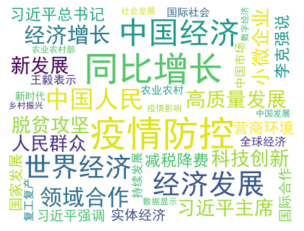

In [372]:
#绘制关键词词云图
my_cloud = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=400, height=300,
    max_words=100,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=50,         # 设置字体最大值
    min_font_size=10,         # 设置子图最小值
    random_state=100           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(key_phrases_count)
plt.imshow(my_cloud, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.savefig('key_phrases.jpg', bbox_inches='tight',dpi = 2000)

In [90]:
#关键句列表
key_sentences=[]
for i in range(len(text)):
    l=list()
    tr4s=TextRank4Sentence()
    tr4s.analyze(text[i],lower=True)
    for item in tr4s.get_key_sentences(num=3):
        l.append(item.sentence)
    key_sentences.append(l)

In [99]:
#key_sentences

In [96]:
ks=pd.DataFrame(key_sentences)

In [97]:
ks.to_excel(r'C:\\Users\\X1\\Desktop\\关键句.xlsx')

In [98]:
len(ks)

32919

分词

In [1]:
import pkuseg

In [9]:
seg = pkuseg.pkuseg(user_dict= "C:\\Users\\X1\\Desktop\\userdict.txt")
t=seg.cut(text[0])

['习近平',
 '对',
 '全军',
 '后勤',
 '工作会议',
 '作出',
 '重要',
 '指示',
 '强调',
 '加快',
 '推动',
 '现代',
 '后勤',
 '高',
 '质量',
 '发展',
 '为',
 '实现',
 '建军',
 '一百',
 '年',
 '奋斗',
 '目标',
 '提供',
 '有力',
 '支撑',
 '新华社',
 '北京',
 '11月',
 '23日',
 '电',
 '（',
 '记者',
 '梅常伟',
 '）',
 '全军',
 '后勤',
 '工作会议',
 '11月',
 '22日',
 '至',
 '23日',
 '在',
 '京',
 '召开',
 '。',
 '中共中央',
 '总书记',
 '、',
 '国家',
 '主席',
 '、',
 '中央军委',
 '主席',
 '习近平',
 '作出',
 '重要',
 '指示',
 '，',
 '向',
 '全军',
 '后勤',
 '战线',
 '全体',
 '同志',
 '致以',
 '诚挚',
 '的',
 '问候',
 '。',
 '习近平',
 '强调',
 '，',
 '党的十八大以来',
 '，',
 '全军',
 '后勤',
 '战线',
 '坚决',
 '贯彻',
 '党中央',
 '和',
 '中央军委',
 '决策',
 '部署',
 '，',
 '聚焦',
 '保障',
 '打赢',
 '，',
 '积极',
 '改革',
 '创新',
 '，',
 '着力',
 '建设',
 '一切',
 '为了',
 '打仗',
 '的',
 '后勤',
 '，',
 '为',
 '我军',
 '建设',
 '发展',
 '和',
 '有效',
 '履行',
 '使命',
 '任务',
 '作出',
 '了',
 '重要',
 '贡献',
 '。',
 '希望',
 '同志',
 '们',
 '深入',
 '贯彻',
 '新时代',
 '党',
 '的',
 '强军',
 '思想',
 '，',
 '深入',
 '贯彻',
 '新时代',
 '军事',
 '战略',
 '方针',
 '，',
 '加快',
 '推进',
 '“',
 '十四五',
 '”',
 '规划',
 '任务',
 '落实',
 '，',
 '加快',

In [10]:
text_cut=[]
for i in range(len(text)):
    a=seg.cut(text[i])
    text_cut.append(a)

In [12]:
len(text_cut)

32919

In [14]:
#读取停用词表
stopwords_path = r"C:\Users\X1\Desktop\预处理&分词\朱同尘_分词代码\stop_words.txt"
stop_list = []
with open(stopwords_path, "r") as f:
    for line in f.readlines():
        stop_list.append(line.replace("\n", ""))

In [16]:
#去除停用词和纯数字
for i in range(len(text_cut)):
    l=text_cut[i]
    for word in l:
        if word in stop_list or word.isdigit() or len(word)<=1:
            text_cut[i].remove(word)

In [17]:
tc=pd.DataFrame(text_cut)

In [35]:
stop = open(r'C:\Users\X1\Desktop\ch_stop.txt') # 加载自定义的停用词表，删去一些虚词、助词、标点符号以及对分析任务没有实质性贡献的频繁出现的词（例如数据）
content = stop.read()
stopwords = re.split('\n',content)  #这里是列表
#stopwords = set(stopwords) #转换成哈希表，后面在去停用词的时候效率会大大提高

In [43]:
def tokenize(data, tokenizer):
    assert tokenizer in ['jieba', 'snownlp', 'pkuseg','thulac']
    if tokenizer == 'jieba': # jieba 分词
        seg_list = list(jieba.cut(data.lower(),cut_all = False))
    elif tokenizer == 'snownlp':  # snownlp 分词
        seg_list = SnowNLP(data).words
    elif tokenizer == 'pkuseg':   # pkuseg 分词
        seg_list = seg.cut(data)
    else:   #thulac分词
        thu = thulac.thulac(user_dict= "./userdict.txt", #自定义字典
                    model_path=None, #模型文件所在文件夹
                    T2S=False, #繁转简
                    seg_only=True,deli='_',#词性标注，词与词性分隔符
                    filt=True, #过滤无意义词
                    rm_space=True)#去掉文本空格
        seg_list = thu.cut(data,text=True).split()
    seg_list_nolinebreak = [i for i in seg_list if i != '\n' and i != ' ']  # 发现在停词表中定义换行符不能删掉分词后的换行符，因此直接使用列表操作剔除空格与换行符
    after_delect_stopwords = [i for i in seg_list_nolinebreak if i not in stopwords]  # 去掉停用词  
    after_delect_num = []
    for i in after_delect_stopwords:
         after_delect_num.append(re.sub('[a-zA-Z0-9]', "", i))  # 这里将所有分词得到的数字、字母都过滤掉,只保留汉字部分
    after_delect_num = [i for i in after_delect_num if i !=  '']
    return after_delect_num

In [55]:
text_cut=[]
for i in range(len(text)):
    l=tokenize(text[i], 'pkuseg')
    text_cut.append(l)

In [50]:
len(text)

32919

In [57]:
tc=pd.DataFrame(text_cut)

In [58]:
tc.head()

,0,1,2,3,4,5,6,7,8,9,...,13362,13363,13364,13365,13366,13367,13368,13369,13370,13371
0,习近平,全军,后勤,工作会议,作出,重要,指示,强调,加快,推动,...,None,None,None,None,None,None,None,None,None,None
1,国务院,十四五,对外贸易,高,质量,发展规划,批复,国函,号,各省,...,None,None,None,None,None,None,None,None,None,None
2,近日,国家,发展,改革,委,部门,联合,印发,进一步,健全,...,None,None,None,None,None,None,None,None,None,None
3,前,三季度,全国,新增,减税,降费,亿,元,——,超,...,None,None,None,None,None,None,None,None,None,None
4,新华社,酒泉,月,日,电,李,国利,奉青玲,月,日,...,None,None,None,None,None,None,None,None,None,None


In [59]:
dic = {"分词结果": pd.Series(text_cut)}
c = pd.DataFrame(dic)

In [60]:
c

,分词结果
0,"[习近平, 全军, 后勤, 工作会议, 作出, 重要, 指示, 强调, 加快, 推动, 现代..."
1,"[国务院, 十四五, 对外贸易, 高, 质量, 发展规划, 批复, 国函, 号, 各省, 自..."
2,"[近日, 国家, 发展, 改革, 委, 部门, 联合, 印发, 进一步, 健全, 社会, 救..."
3,"[前, 三季度, 全国, 新增, 减税, 降费, 亿, 元, ——, 超, 九成, 企业, ..."
4,"[新华社, 酒泉, 月, 日, 电, 李, 国利, 奉青玲, 月, 日, 时, 分, 我国,..."
...,...
32914,"[李克强, 总理, 日, 太原市, 北关, 棚户区, 考察, 岁, 老太太, 李, 反, 玉..."
32915,"[李克强, 总理, 日, 太原市, 北关, 棚户区, 考察, 居民, 说, 棚户区, 成长,..."
32916,"[李克强, 总理, 日, 考察, 太原, 钢铁, 集团, 太钢, 集团, 全球, 不锈钢, ..."
32917,"[多数, 农民, 吃, 农民, 饭, 祖上, 应该, 农民, 应该, 带, 感情, 农民, ..."


In [61]:
c.to_excel(r'C:\\Users\\X1\\Desktop\\分词结果.xlsx')

In [74]:
#text_cut

In [83]:
c=['记者','新华社']
#去除一字词
for i in range(len(text_cut)):
    l=text_cut[i]
    for word in l:
        if word in c or len(word)<2:
            text_cut[i].remove(word)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
test=text_cut[:200]

In [88]:
count_vec=CountVectorizer()

In [91]:
count_vec.fit_transform(text_cut[0]).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [92]:
text_cut[0]

['习近平',
 '全军',
 '后勤',
 '工作会议',
 '作出',
 '重要',
 '指示',
 '强调',
 '加快',
 '推动',
 '现代',
 '后勤',
 '质量',
 '发展',
 '实现',
 '建军',
 '一百',
 '奋斗',
 '目标',
 '提供',
 '有力',
 '支撑',
 '北京',
 '梅常伟',
 '全军',
 '后勤',
 '工作会议',
 '召开',
 '中共中央',
 '总书记',
 '国家',
 '主席',
 '中央军委',
 '主席',
 '习近平',
 '作出',
 '重要',
 '指示',
 '全军',
 '后勤',
 '战线',
 '同志',
 '致以',
 '诚挚',
 '问候',
 '习近平',
 '强调',
 '党的十八大以来',
 '全军',
 '后勤',
 '战线',
 '坚决',
 '贯彻',
 '党中央',
 '中央军委',
 '决策',
 '部署',
 '聚焦',
 '保障',
 '打赢',
 '积极',
 '改革',
 '创新',
 '着力',
 '建设',
 '打仗',
 '后勤',
 '我军',
 '建设',
 '发展',
 '有效',
 '履行',
 '使命',
 '任务',
 '作出',
 '重要',
 '贡献',
 '希望',
 '同志',
 '深入',
 '贯彻',
 '新时代',
 '强军',
 '思想',
 '深入',
 '贯彻',
 '新时代',
 '军事',
 '战略',
 '方针',
 '加快',
 '推进',
 '十四五',
 '规划',
 '任务',
 '落实',
 '加快',
 '建设',
 '现代',
 '军事',
 '物流',
 '体系',
 '军队',
 '现代',
 '资产管理',
 '体系',
 '加快',
 '推动',
 '现代',
 '后勤',
 '质量',
 '发展',
 '实现',
 '建军',
 '一百',
 '奋斗',
 '目标',
 '提供',
 '有力',
 '支撑',
 '中共中央',
 '政治局',
 '委员',
 '中央军委',
 '副主席',
 '张又侠',
 '出席会议',
 '讲话',
 '强调',
 '深入',
 '贯彻',
 '主席',
 '重要',
 '指示',
 '决策',
 '部署',
 '围绕',
 '支撑',

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf=TfidfVectorizer()

In [ ]:
weight=tfidf.fit_transform(test).toarray()

In [99]:
text = """我是一条天狗呀！
我把月来吞了，
我把日来吞了，
我把一切的星球来吞了，
我把全宇宙来吞了。
我便是我了！"""
sentences = text.split()
sent_words = [list(jieba.cut(sent0)) for sent0 in sentences]
#document = [" ".join(sent0) for sent0 in sent_words]
#print(document)

In [101]:
sent_words

[['我', '是', '一条', '天狗', '呀', '！'],
 ['我', '把', '月', '来', '吞', '了', '，'],
 ['我', '把', '日来', '吞', '了', '，'],
 ['我', '把', '一切', '的', '星球', '来', '吞', '了', '，'],
 ['我', '把', '全宇宙', '来', '吞', '了', '。'],
 ['我', '便是', '我', '了', '！']]

In [102]:
document = [" ".join(sent0) for sent0 in text_cut]

In [105]:
#document

In [108]:
#document[:200]

In [360]:
tfidf_model = TfidfVectorizer(max_features=115).fit(document[:200]) 
# 每个特征至少在25%的文档中出现，至多85%的文档使用词

In [361]:
#tfidf_model.vocabulary_

In [362]:
tfidf = tfidf_model.transform(document[:200]) 
tfidf

<200x115 sparse matrix of type '<class 'numpy.float64'>'
	with 6663 stored elements in Compressed Sparse Row format>

In [235]:
vectorizer=sparse_result.toarray()

In [236]:
vectorizer

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.09030511, ..., 0.        , 0.        ,
        0.        ],
       [0.03283488, 0.        , 0.00868924, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02418869, ..., 0.        , 0.        ,
        0.02579017]])

In [237]:
#获取模型中的所有词语  
word = tfidf_model.get_feature_names()

In [187]:
word

['不断',
 '世界',
 '东盟',
 '中国',
 '中央',
 '主体',
 '习近平',
 '产业',
 '人员',
 '人民',
 '今年',
 '企业',
 '会议',
 '伟大',
 '体系',
 '促进',
 '保障',
 '信息',
 '党中央',
 '全国',
 '全球',
 '全面',
 '共同',
 '关系',
 '农业',
 '农村',
 '创新',
 '制度',
 '加强',
 '加快',
 '北京',
 '医疗',
 '历史',
 '发展',
 '取得',
 '合作',
 '同比',
 '国务院',
 '国家',
 '国际',
 '地区',
 '坚持',
 '基本',
 '基础',
 '增长',
 '奋斗',
 '安全',
 '完善',
 '实施',
 '实现',
 '就业',
 '工业',
 '工作',
 '市场',
 '建立',
 '建设',
 '开展',
 '强调',
 '思想',
 '我国',
 '技术',
 '投资',
 '持续',
 '推动',
 '推进',
 '提供',
 '提出',
 '提升',
 '提高',
 '支持',
 '改革',
 '政治',
 '政策',
 '方面',
 '更加',
 '服务',
 '机制',
 '构建',
 '核酸',
 '检测',
 '水平',
 '深化',
 '特色',
 '环境',
 '理论',
 '生产',
 '疫情',
 '社会',
 '社会主义',
 '科技',
 '积极',
 '稳定',
 '管理',
 '组织',
 '经济',
 '维护',
 '绿色',
 '网络',
 '能力',
 '落实',
 '表示',
 '要求',
 '质量',
 '进一步',
 '进行',
 '部门',
 '重大',
 '重点',
 '重要',
 '金砖',
 '问题',
 '项目',
 '领域',
 '领导',
 '马克思主义']

In [306]:
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf3.toarray()

In [199]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [253]:
#判断最佳聚类数
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init="k-means++").fit(data).inertia_)
        
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

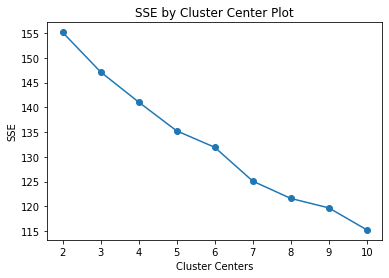

In [363]:
find_optimal_clusters(tfidf,10)

In [198]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score(X, method.labels_, metric='euclidean')

In [364]:
clf = KMeans(n_clusters=6)

In [365]:
s = clf.fit(tfidf)

In [366]:
labels=s.labels_

In [221]:
silhouette_score(tfidf,labels)

0.026904666214131224

In [223]:
for i in range(2,10,1):
    model=KMeans(n_clusters=i).fit(tfidf)
    labels=model.labels_
    print(silhouette_score(tfidf,labels))

0.024745114648606053
0.021545626998074247
0.02076684638317872
0.02448979251337648
0.026282932727410207
0.0289052494471395
0.03523337567853201
0.03340995737529051


In [229]:
tf=TfidfVectorizer(max_df=0.5)

In [231]:
result = list(model2.predict(tfidf2))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

TfidfVectorizer(max_df=0.5)

In [367]:
#关键词展示
# km-tfidf
print("Top terms per cluster:")
order_centroids = s.cluster_centers_.argsort()[:, ::-1]

for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 一大 一季度 上年 中东欧 一带 上市 不能 下降 专家 专项
Cluster 1: 中共中央 不断 个人 上午 三大 东北 专家 中国人民 专业 中小微
Cluster 2: 不能 上年 一带 互通 专家 上市 不断 下降 一体化 专门
Cluster 3: 严格 丰富 上海 乡镇 习近平 中方 中国国际 不断 一致 万亿
Cluster 4: 业态 不足 一线 中国制 中国人民 中国国际 一致 严重 下行 习近平
Cluster 5: 一致 个体工商户 一家 不断 丰富 上涨 中方 主管部门 中小企业 专业


In [368]:
#统计每一类的文档数量
result = list(s.predict(tfidf))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{1: 85, 5: 30, 2: 43, 0: 18, 4: 15, 3: 9}


In [240]:
 #每个样本所属的簇
    label = []               
    i = 1
    while i <= len(clf.labels_):
        label.append(clf.labels_[i-1])
        i = i + 1

In [241]:
y_pred = clf.labels_

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)             #输出两维
newData = pca.fit_transform(weight)   #载入N维
    
xs, ys = newData[:, 0], newData[:, 1]
    #设置颜色
cluster_colors = {0: 'r', 1: 'yellow', 2: 'b', 3: 'chartreuse', 4: 'purple', 5: '#FFC0CB', 6: '#6A5ACD', 7: '#98FB98'}
                  
    #设置类名
cluster_names = {0: u'类0', 1: u'类1',2: u'类2',3: u'类3',4: u'类4',5: u'类5',6: u'类6',7: u'类7'} 
    
df = pd.DataFrame(dict(x=xs, y=ys, label=y_pred)) 
groups = df.groupby('label')
    
fig, ax = plt.subplots(figsize=(8, 5)) # set size
ax.margins(0.02)
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=cluster_names[name], color=cluster_colors[name], mec='none')
     
plt.show()

In [148]:
from sklearn.cluster import KMeans
mykms=KMeans(n_clusters=10)
y=mykms.fit_predict(weight)
for i in range(0,10):
    label_i=[]
    for j in range(0,len(y)):
        if y[j]==i:
            label_i.append(word[j])
    print('label_'+str(i)+':'+str(label_i))

label_0:['上午', '上月', '上海', '上涨', '上述', '下降', '不同', '不少', '不断', '不断提高', '中央', '优势', '传统', '保供', '保护', '免疫']
label_1:['一百', '世界经济', '中央军委', '中欧', '丰富', '之间', '产品', '人员', '企业家', '优秀', '作用', '供应链', '供给', '保持', '保证', '倡议', '健全', '党员', '公平竞争', '共同']
label_2:['一定', '一路', '世纪', '中国人民', '事项', '人类', '亿美元', '伙伴', '会晤', '低碳', '作出', '依然', '保费']
label_3:['不能', '与会', '世界', '东盟', '个人', '中心', '为基础', '主动', '主权', '主题', '乡镇', '事业', '产量', '低保', '体现', '体育', '使用']
label_4:['互信', '全党', '全力', '全员', '全国', '全年', '全方位', '全球', '全面', '公共', '公司']
label_5:['万亿', '中华民族', '中方', '主要', '举办', '举措', '习近平新时代', '互利', '交流', '产业链', '产权', '产生', '人民', '人群', '今天', '会议', '伟大', '传播', '体系', '供应', '促进', '保险', '健康发展', '先进', '全会', '公平', '公约', '共产党人']
label_6:['一道', '不足', '专家', '业务', '严重', '中国市场', '中国经济', '中非', '主席', '优化', '信息化', '健康', '充分']
label_7:['一带', '一致', '专业', '专项', '严格', '中国', '中部', '优先', '俄罗斯', '信息', '全球化', '共享']
label_8:['东北', '举行', '乡村', '了解', '产能', '人才', '人文', '以下简称', '仪器', '价格', '价格上涨', '依托', '信念', '做到']
label_9:['一个', '一体

In [247]:
tfidf_model1 = TfidfVectorizer().fit(document) 

In [251]:
tfidf1 = tfidf_model1.transform(document) 
tfidf1

<32919x160469 sparse matrix of type '<class 'numpy.float64'>'
	with 5401758 stored elements in Compressed Sparse Row format>

In [250]:
word = tfidf_model1.get_feature_names()

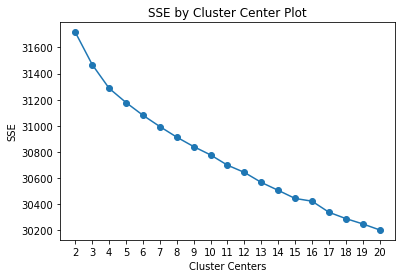

In [254]:
find_optimal_clusters(tfidf1,20)

In [376]:
#向量长度缩减为十分之一
tfidf_model2 = TfidfVectorizer(max_features=16047).fit(document) 

In [377]:
tfidf2 = tfidf_model2.transform(document) 
tfidf2

<32919x16047 sparse matrix of type '<class 'numpy.float64'>'
	with 4930760 stored elements in Compressed Sparse Row format>

In [379]:
word = tfidf_model2.get_feature_names()

In [262]:
#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf2.toarray()

In [380]:
#进行聚类，先聚六类
model2=KMeans(n_clusters=6).fit(tfidf2)

In [386]:
print("Top terms per cluster:")
order_centroids = model2.cluster_centers_.argsort()[:, ::-1]

for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % word[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 当日 工作 北京 国家 全国 中国 总理 活动 铁路 举行 人员 国务院 新闻 安全 服务 进行 李克强 旅游 发展 农民
Cluster 1: 企业 发展 改革 创新 服务 市场 政策 经济 李克强 建设 监管 推进 工作 我国 支持 中国 产业 政府 环境 国务院
Cluster 2: 增长 同比 百分点 月份 增速 消费 企业 经济 我国 工业 万亿 中国经济 下降 制造业 发展 上年 出口 上半年 中国 利润
Cluster 3: 习近平 发展 工作 中国 总书记 人民 国家 主席 中共中央 强调 建设 疫情 会议 坚持 社会主义 全面 领导 讲话 精神 重要
Cluster 4: 就业 扶贫 贫困 脱贫 攻坚 毕业生 地区 创业 工作 人口 帮扶 高校 政策 企业 培训 农村 产业 服务 精准 岗位
Cluster 5: 合作 关系 中方 中国 发展 双方 共同 习近平 王毅 总理 国家 国际 表示 主席 会见 李克强 一带 一路 伙伴 推动


In [385]:
for ind in order_centroids[4, :]:
    print(' %s' % word[ind], end='')

 就业 扶贫 贫困 脱贫 攻坚 毕业生 地区 创业 工作 人口 帮扶 高校 政策 企业 培训 农村 产业 服务 精准 岗位 搬迁 保障 职业 劳动力 贫困户 技能 发展 群众 招聘 资金 国务院 人员 全国 贫困县 社会 城镇 农民工 支持 实现 重点 易地 建档 立卡 稳定 任务 开发 实施 今年 攻坚战 深度 落实 扶贫办 乡村 困难 问题 我国 促进 胡春华 加大 开展 基本 劳动者 经济 项目 减贫 务工 教育 失业 推进 行动 建设 目标 提高 确保 残疾人 中央 做好 带动 群体 补贴 力度 加强 吸纳 全面 灵活 家庭 疫情 资源 解决 完成 强调 车间 人社部 专项 人才 外出 提供 收入 各地 优先 失业率 摘帽 中国 持续 新增 基层 劳动 部门 民生 贫困村 打赢 单位 会议 市场 重要 增长 稳岗 能力 增加 帮助 财政 措施 生活 特色 职工 完善 安置 医疗 强化 增收 提升 国家 活动 标准 情况 要求 扩大 人力 小组 质量 目前 领导 组织 扶持 部署 计划 需求 方面 消费 条件 机制 政府 推动 省份 形势 进一步 鼓励 表示 制度 积极 创新 加快 求职 建立 农民 平台 干部 公共 协作 李克强 深入 基础 坚持 水平 改革 影响 人数 举措 生态 通知 小康 居民 三州 振兴 总理 招聘会 保持 累计 超过 指导 工程 介绍 巩固 农产品 集中 习近平 用工 总书记 引导 生产 总体 规模 失业保险 饮水 农业 提出 近年来 返乡 召开 不断 了解 对接 城乡 渠道 改善 成果 规划 用人 指出 汪洋 更加 考核 发挥 充分 地方 继续 意见 调查 网络 投入 技术 保险 设施 有效 参与 统筹 东西部 定点 责任 中西部 救助 产业发展 明确 村民 党中央 管理 全年 基地 切实 体系 安全 各类 信息 模式 建成 突出 电商 范围 安排 人力资源和社会保障部 机构 拓展 及时 努力 一个 创造 兜底 作用 大学生 养老 去年 补助 出台 达到 取得 坚决 纳入 增强 住房 贷款 学生 百分点 低保 给予 工资 领域 产品 财政部 健全 实际 北京 进行 力量 成效 合作社 各项 组长 倾斜 月份 金融 大力 当前 如期 教育部 防止 聚焦 主体 登记 相关 发放 形态 环境 十三五 专场 抓好 方式 一批 机会 健康 

 亲自 发展银行 持证 创业平台 综合评价 领会 所属 大大 副主席 执法 紧迫 运作 身边 留学人员 就学 反馈 执政 高度关注 上万 事情 网店 举世瞩目 自行车 多重 生动 机械 简易 贯通 一揽子 节余 青年人 主要指标 最高 语言 减灾 救灾 遴选 宣讲 过后 降到最低 副行长 光纤 财政赤字 锻炼 学业 共产党人 务农 配备 宏观经济政策 煤炭 财务 人均收入 含金量 初中 弘扬 角度 回乡 利率 发展阶段 配件 大盘 林善传 中国国际 联控 不住 只能 高达 海外 国办 非洲 竞争 安心 对策 养殖业 二产 风景 成都市 地级 征兵 住房公积金 联防 肥乡区 小小 医养 猪肉 公办 党建 总社 鉴定 该项 上来 生涯 浙江省 市民 技能型 政策法规 战役 高等教育 第一线 农网 升级版 重症 用途 这家 公用 几十 缩影 封顶 密切关注 就可以 保鲜 顶层 情节 登记注册 竞赛 土壤 解难 致辞 党校 反对 丰收 市区 资费 拨备 黄土 引发 林草局 全局 红包 走向 定力 时代 下沉 专栏 总的看 枣庄市 实事求是 框架 新机制 西安 建材 漫灌 运送 游客 投资建 一视同仁 建功立业 追责 三峡 自觉 天地 契税 企业融资 修建 上年度 求真务实 房屋 大水 坦言 陷阱 协同发展 上规模 战略性 通用 过半 研究室 同月 全额 私营 主渠道 中国石化 近万 迫切 单列 百色市 加重 资产管理 初创 几乎 调解 救济 根据需要 农合 接收 负面 降为 加剧 资金要 个性化 果蔬 取向 驱动 茶园 专科 情形 一点 老乡 曲靖市 照料 见面 在外 流域 得以 驾驶员 感染 工艺品 迁入 连锁 助学 保安 提振 候选人 维权 暗访 排忧解难 大军 计生委 将来 出资 门口 银川市 勇于 赢得 降到 搬运 唯一 享有 防控工作 扩围 服务贸易 保健 农林 事件 节能环保 住房和城乡建设部 松懈 经济师 不利 地区投资 对症下药 摩擦 工信部 南南合作 专家组 阅读 首都 充分释放 水质 劲头 反复 红火 极大 表率 申报 玉米 特派员 初加工 筑牢 苗头性 陶明 设有 米袋子 力戒 品尝 房子 防线 事实上 补上 申铖 填表 空前 逐季 境外 不再 风筝 食堂 基金会 受益人 痛点 王浩 周岁 蜿蜒 负责制 今年底 预定 在家 张北县 民企 消极 节目 对

 显效 二中 说到 提出申请 奥运会 租房 已确定 手上 电动化 充电桩 回避 东盟 刘卫兵 预料 准确率 不可或缺 清欠 上扬 消防 抹黑 本扬 世尧 可信 告知 一共 亮丽 车用 安吉县 梯次 必需 开放式 对内 盲区 售后服务 驰而不息 授课 序幕 双语 一脉相承 中心村 金融稳定 购买力 选人 专用 全人类 祝福 读者 机动 投保 调运 引来 高龄 数额 频繁 姑息 增长较快 拼版 雾霾 保健食品 湘西土家族苗族自治州 快件 大峡谷 化学 折算 基准 总台 电压 类似 摄习 跳出 中国证监会 进口商 教训 蛋糕 职业化 后来 相关人士 棚改 范例 冲锋 经济作物 惊叹 救急 说到底 科学化 随访 家人 下决心 热议 责任人 称赞 化学品 百度 体会 万户 实处 央视 林业局 不尽相同 电费 书面 兴奋 审定 抽取 机具 尊严 起草 对中小企业 堤防 海口市 干扰 下单 西方 侨胞 同时指出 秋收 同类 藏族 投资管理 究竟 脱颖而出 甘孜藏族自治州 探月 前海 评定 刊文 路透社 无穷 衣着 调价 西南部 就任 无形资产 工行 金融环境 中国电子商务 用心 购房 走高 停业 年份 主产区 节节 全天候 出售 保有量 装配 海地 联想 大兴安岭 国务委员 指向 该省 赡养 搬入 手艺 全文 放下 政要 三江侗族自治县 增值税发票 业务范围 可及性 焕发 酝酿 风采 此事 监督体系 瀑布 玉树 刘志强 转给 宅基地使用权 尽力而为 装箱 胡超 消灭 复产率 查明 线索 上好 外科 喀什市 本来 国际经验 副所长 取决于 日本 天空 废物 三一 会计 引用 业链 减征 枸杞 融资需求 颜色 介入 乌兰察布市 增信 济南市 边陲 全网 优美 轿车 容器 镇赉县 致以 车厢 才华 民盟 单向 建筑物 米锋 折叠 合影 自用 规避 白天 立新 绘制 债券发行 足不出户 挂号 脸上 成交 支部 总共 事中 大风 兰渝 寻常 危化品 急性 支点 监管政策 减排 统计师 喀什 水旱 安装 该校 家属 管理司 网购 这不 市场呈现 开学 有约 姐妹 必由之路 满满 需求端 新气象 反应 有色金属 草根 各市 演讲 迹象 百姓家 不俗 护航 预判 汉中市 本源 畜牧业 两点 买到 政策出台 厦门市 策划 上市公司 入围 持有 中国财 进一步改进 收看 聪明才智 人物 失衡 种业 

 荒滩 荷兰 观赏 荷塘 倒塌 莫桑比克 修养 菜品 规程 倍感 佛教 莫盖里尼 倍加 莫莫格 莫迪 菜农 菜价 获评 修枝 修正 获利 修身 莲藕 莱特希泽 莲花 修补 余杭区 莫尼列 信用评级机构 信阳 作品展 规律性 信箱 作价 荷方 信誉 萍乡市 候鸟 莆田 萌芽 装置 候车室 作业区 候车 莆田市 菲方 规模扩张 菲德尔 菲利普 菜市场 莫尔兹比港 落幕 信函 停滞 做饭 苏区 使用者 西路军 觉醒 苏州市 保育 体验区 体验式 苏方 蓄能 蓄积量 落成 苏联 蓄水 蓄势待发 苏里南 体验馆 苗华 蒸汽 蒙钟德 苗圩 觉果 苏丹 停放 角逐 停机坪 停泊 西站 停步 虚拟货币 体育场 保本 虚开 虚假宣传 薰衣草 薪火相传 花篮 佛山市 薛祥 蔡奇 体育场馆 蓬佩奥 解放思想 蓝鲸 花雨 使用费 体质 蒙特利尔 蒙方 蒙巴萨 覆膜 英民 观光园 偏多 著作权法 英特尔 假日 著作权 假冒 茂华 观察员 佩戴 何种 何维 佩列 视听 著作 茌平县 俞正声 茶具 信仰 倾倒 葡方 偏弱 蒙华 偏紧 苦练 蒙内 董建华 董希淼 董事会 西迁 西门子 舰艇 董事 何厚铧 英文 英方 何去何从 英格利希 要道 偏见 佳鹏 葡萄牙 保障法 佳话 觉悟 供热 八桂 充足率 冯德莱恩 冰壶 冰川 冰灯 冰球 冰盖 冰箱 冰雕 冰雪 冰雪季 筹建 冲动 第二十四 第二十六 第二十五 第二十三 第二十七 决断 冰冻 冬闲 第三十八 冬至 管内 管住 算力 简约 简报 冬奥 简并 冬奥村 冬奥组委 签注 冬季两项 冬小麦 冬捕 签字 冬春 冬枣 签名 第三十六 决赛 突尼斯 童装 站长 站稳 立陶宛 立法机构 立春 立德树人 立德 立冬 准营 准许 立党 立体 立交桥 凌晖 凌晨 减产 窝点 章程 净资产 冶炼 净网 冷冻 第三十二 冷战 第三十三 冷空气 第三十 符拉迪沃斯托克 笔数 笔头 冻结 竹笛 净利润 净化 端口 端午节 端午 童话 管委会 农艺 农耕 再融资 红酒 冒用 红糖 写下 红灯笼 红树林 军乐团 军乐队 红外 红嘴鸥 军区 军喜 军地 军官 军工 纠错 军衔 红顶 再生 管理区 再现 纯洁性 内设 内贸 内资 纯洁 内部审计 纪念邮票 纪念碑 内阁 纪念日 纪念品 冈比亚 再保险 纪律检查委员会 再投资 约车 约束力 纠缠 繁衍 繁荣昌盛 繁母 粮库 粮仓

 寺庙 寻亲 张楠 张晨霖 张春雷 寻甸回族彝族自治县 张春贤 导入 张掖市 导弹 导游 导线 引出 弊端 小学生们 异议 开年 开幕会 开市 少有 尖端 开封 开好 开场 开园 开发银行 开具 建邦 建设银行 建设性 建警 就座 建行 就绪 建章立制 少先队员 少先队 少儿 开赛 开门红 开门 开镰 小年 开采业 开采 开邦 开足马力 小满 开挖 开票 开班式 开班 开标 开放日 开放性 小马庄镇 开放度 张辛欣 弥合 弯道 彼岸 徜徉 得失 得名 徒步 徐绍史 徐昱 家风 容克 徐徐 徐工 徐州 容缺 律师事务所 容错 待售 待命 征管 征求意见稿 征期 家用电器 家族 微企 德方 徽州 德龙 德索萨 德清县 室外 宪章 宴会厅 德智体美劳 德才兼备 微小 微软 微调 家宴 微笑 家居 微生物 微波 家底 征信系统 彻查 强制性 寄语 寒冷 寒潮 寓意 当即 当事人 归根到底 对价 归并 归侨 强音 强盛 强权 对外经济 强基 对外资 强劲增长 强加 对手 强制措施 寒冬 寒假 富阳区 密钥 寄递 影片 密云 影像 彭源 彭博社 彭华岗 彭丽媛 彩色 当场 彩绘 彩灯 富国 形状 富时 当量 当晚 当局 建盏 建瓯市 建校 布方 带宽 崔家营 带动力 帕夫洛普洛斯 希腊 川渝 川西 州长 希方 师生们 帆船 布鲁塞尔 布隆迪 巡游 巡线 布达拉宫 布达佩斯 巡视器 巡逻 带电 崇礼 崇德 岚皋县 干细胞 干涉 干流 常青 屹立 常设 常用 常州 岛屿 席位 岭南 岳月伟 常任 岳阳 岸电 岸边 席卷 峰值 巢湖 布展 山海 工业司 工区 巴新 工厂化 巴斯夫 巴拿马 工商界 巴士 巴勒斯坦 差额 工委 差评 巫山 巨额 巨轮 巨幅 巨头 工程局 巨型 左岸 巴方 工务段 工务 工作区 布宜诺斯艾利斯 布基纳法索 工人们 工人阶级 市市 市域 市场稳定 市场研究 市场占有率 巴特图勒嘎 市场信心 市值 市人大 巴黎 巴雷拉 巴赫 巴育 巴特尔 山脉 山洪 建斌 展出 废水 废气 废止 店主 底部 居住证 底蕴 居安思危 应邀 应约 居民个人 应税 应当通过 应变 屋面 屋顶 库雷希 库钦斯基斯 库布其 层林尽染 废钢 度假区 尽显 尼方 尼日利亚 建威 建功 建伟 建交 延霞 延时 延庆区 座位 延庆 廊道 廊坊 尾声 廉洁自律 局地 康震 康乃馨 库尔勒 庆黎 

In [ ]:
result = list(model2.predict(tfidf2))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

In [276]:
#聚四类
model3=KMeans(n_clusters=4).fit(tfidf2)

In [282]:
print("Top terms per cluster:")
order_centroids = model3.cluster_centers_.argsort()[:, ::-1]

for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 企业 发展 改革 工作 创新 服务 就业 政策 建设 市场
Cluster 1: 增长 同比 百分点 月份 增速 消费 企业 经济 我国 工业
Cluster 2: 合作 关系 中方 中国 发展 共同 双方 习近平 国家 主席
Cluster 3: 国家 北京 工作 当日 中国 习近平 全国 举行 活动 总理


In [283]:
result = list(model3.predict(tfidf2))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{0: 8796, 3: 17030, 2: 4714, 1: 2379}


In [284]:
#向量长度缩减为百分之一
tfidf_model3 = TfidfVectorizer(max_features=1605).fit(document) 

In [285]:
tfidf3 = tfidf_model3.transform(document) 
tfidf3

<32919x1605 sparse matrix of type '<class 'numpy.float64'>'
	with 3245365 stored elements in Compressed Sparse Row format>

In [286]:
word = tfidf_model3.get_feature_names()

In [287]:
#进行聚类，先聚六类
model4=KMeans(n_clusters=6).fit(tfidf3)

In [288]:
print("Top terms per cluster:")
order_centroids = model4.cluster_centers_.argsort()[:, ::-1]

for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 习近平 中国 主席 国家 发展 人民 总书记 世界 北京 出席
Cluster 1: 企业 创新 发展 就业 改革 市场 政策 经济 李克强 服务
Cluster 2: 合作 关系 中方 双方 中国 发展 共同 总理 王毅 会见
Cluster 3: 增长 同比 百分点 月份 增速 消费 我国 企业 经济 万亿
Cluster 4: 当日 铁路 举行 游客 北京 活动 拍摄 农民 总理 河北省
Cluster 5: 工作 服务 安全 管理 部门 保障 全国 建设 群众 国家


In [289]:
result = list(model4.predict(tfidf3))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{0: 3728, 5: 8100, 1: 4637, 4: 10366, 2: 3652, 3: 2436}


In [290]:
#进行聚类，聚四类
model5=KMeans(n_clusters=4).fit(tfidf3)

In [292]:
print("Top terms per cluster:")
order_centroids = model5.cluster_centers_.argsort()[:, ::-1]

for i in range(4):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 企业 工作 发展 改革 服务 创新 建设 政策 市场 就业
Cluster 1: 当日 北京 中国 习近平 国家 举行 活动 铁路 总理 游客
Cluster 2: 增长 同比 百分点 月份 增速 企业 消费 经济 我国 中国经济
Cluster 3: 合作 关系 中方 中国 发展 双方 共同 习近平 主席 总理


In [293]:
result = list(model5.predict(tfidf3))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{0: 11876, 1: 13567, 3: 4654, 2: 2822}


In [302]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib.font_manager import FontProperties

In [303]:
#可视化展示
def plot_cluster(num_cluster,feature_matrix,cluster_data,movie_data,plot_size=(16,8)):
    def generate_random_color():
        color='#%06x'%random.randint(0,0xFFFFFF)
        return color
    markers=['o','v','^','<','>','8','s','p','*','h','H','D','d']
    cosine_distance=1-cosine_similarity(feature_matrix)
    mds=MDS(n_components=2,dissimilarity="precomputed",random_state=1)
    plot_positions=mds.fit_transform(cosine_distance)
    x_pos,y_pos=plot_positions[:,0],plot_positions[:,1]
cluster_color_map={}
cluster_name_map={}
for cluster_num,cluster_details in cluster_data.items():
    cluster_color_map[cluster_num]=generate_random_color()
    cluster_name_map[cluster_num]=','.join(cluster_details['key_features'][:5]).strip()

In [308]:
centers=model5.cluster_centers_

In [ ]:
pre=model5.predict(tfidf3)
plt.figure()
for i in range(4):
    index_sets=np.where(pre==i)
    cluster=tfidf3[index_sets]
    plt.scatter(cluster[:,0],cluster[:,1],marker='.')
plt.show()

In [312]:
tsne=TSNE(n_components=2,random_state=1233)
vec=tsne.fit_transform(tfidf3)